In [92]:
def mg(x,times,time0):
    """
    x 为数据不能有缺失值
    times 为时间序列
    time0 第一个时间
    """
#     print(x[0])
    unaddsummean = -x.expanding(1).sum().rolling(2,2).mean()[1:].values
#     print(unaddsummean)
    Yn = x[1:].values
#     print(Yn)
    BT = np.vstack((np.array(unaddsummean),np.array([1 for _ in range(len(unaddsummean))])))
#     print(BT)
    a_ = np.dot(np.matrix(np.dot(BT,BT.T)).I,np.dot(BT,Yn))
    a = a_[[0],[0]]
#     print(a)
    u=a_[[0],[1]]
#     print(u)
    x2=[]
    for i in times:
        x2.append(np.float(((x[0]-u/a)*np.exp(-a*(i - time0))+u/a)))
#     print(x2)
    yc = [x[0]] 
    for m in range(1,len(x2)):
        yc.append(x2[m]-x2[m-1])
#     print(yc)
    plt.plot(range(len(x)),x,label='真实')
    plt.plot(range(len(yc)),yc,label='预测')
    plt.legend()
    plt.show()
    return yc

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=['SimHei']

In [94]:
df = pd.read_excel(r"E:\大二下\数据分析\灰色预测\gm.xlsx")
df

,时间,人口
0,1985,101.02
1,1986,102.19
2,1987,106.50
3,1988,111.08
4,1989,113.28
5,1990,115.97
6,1991,118.02
7,1992,119.99
8,1993,123.23
9,1994,132.37


In [95]:
df[:15]['人口']

0     101.02
1     102.19
2     106.50
3     111.08
4     113.28
5     115.97
6     118.02
7     119.99
8     123.23
9     132.37
10    135.95
11    138.82
12    143.18
13    146.51
14    151.54
Name: 人口, dtype: float64

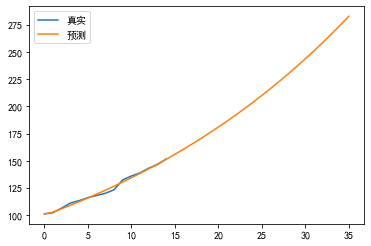

In [96]:
yc = mg(df[:15]['人口'],df['时间'],df['时间'][0])

In [97]:
yc

[101.02,
 102.7239468233488,
 105.83344974265174,
 109.03707880005823,
 112.33768323871027,
 115.73819854970498,
 119.24164908285093,
 122.85115073647648,
 126.56991372863104,
 130.40124545220624,
 134.34855341645016,
 138.4153482775464,
 142.60524696091306,
 146.92197587803275,
 151.36937424063672,
 155.95139747523717,
 160.67212074098734,
 165.53574255405874,
 170.54658852170814,
 175.70911518939283,
 181.02791400433034,
 186.50771539903326,
 192.15339299846346,
 197.96996795454743,
 203.96261341186982,
 210.1366591085698,
 216.49759611651552,
 223.051081724931,
 229.80294447189226,
 236.759189328106,
 243.92600303760446,
 251.3097596201278,
 258.9170260400206,
 266.7545680467865,
 274.8293561923929,
 283.14857203073734]

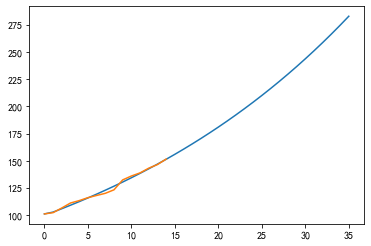

In [98]:
plt.plot(range(len(yc)),yc)
plt.plot(range(len(df[:15]['人口'])),df[:15]['人口'])